In [69]:
import pandas as pd 

In [70]:
df=pd.read_csv('./lending_bien/loan_data.csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [71]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

In [72]:
x=8045/(8045+1533)
x

0.8399457089162664

Si aceptasemos a todos los solicitantes el 83,9% de las personas devolverian el prestamo, tambien porque de los datos que disponemos solo el 16,1% no devuelven el prestamo

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [74]:
mapping_dict = {
    'debt_consolidation': 0,
    'all_other': 1,
    'credit_card': 2,
    'home_improvement': 3,
    'small_business': 4,
    'major_purchase': 5,
    'educational': 6


}
df['purpose'] = df['purpose'].map(mapping_dict)
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,1,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,3,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [48]:
# No creo que influya el acertar si es moroso o no en esto

#cat_data = cat_data.copy()
#le = preprocessing.LabelEncoder()
#cat_data["purpose"] = le.fit_transform(cat_data["purpose"].astype(str))
#cat_data.head()

In [75]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

EQUILIBRAMOS LOS DATOS 

In [9]:
# !pip install -U imbalanced-learn

una técnica u otra:

SMOTE: accuracy del 0.7

Duplicar datos: accuracy del 0.7

__________

In [14]:
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [15]:
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
df = shuffle(df)

______________

In [76]:
# Importa las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
import pandas as pd

# Establece la semilla
seed = 40

# Define X_train e y_train
X_train = df.drop('not.fully.paid', axis=1)
y_train = df['not.fully.paid']

# Aplica SMOTE para equilibrar las clases
smo = SMOTE(sampling_strategy="auto", random_state=seed)
X_train_resampled, y_train_resampled = smo.fit_resample(X_train, y_train)

# Crea un nuevo DataFrame con los datos equilibrados
df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Muestra el nuevo DataFr
df['not.fully.paid'].value_counts()


not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

_________


In [77]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.118900,829.100000,11.350407,19.480000,737,5639.958333,28854,52.100000,0,0,0,0
1,1,2,0.107100,228.220000,11.082143,14.290000,707,2760.000000,33623,76.700000,0,0,0,0
2,1,0,0.135700,366.860000,10.373491,11.630000,682,4710.000000,3511,25.600000,1,0,0,0
3,1,0,0.100800,162.340000,11.350407,8.100000,712,2699.958333,33667,73.200000,1,0,0,0
4,1,2,0.142600,102.920000,11.299732,14.970000,667,4066.000000,4740,39.500000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16085,0,0,0.118579,225.927227,11.007991,11.338817,685,3139.320171,5248,28.955015,9,0,0,1
16086,0,1,0.090250,530.601675,11.032043,8.274918,756,3546.427841,1657,16.591609,4,0,0,1
16087,0,0,0.191826,605.043800,11.785092,18.506760,664,7541.400569,89568,82.235060,1,0,0,1
16088,0,1,0.148009,333.411138,10.826822,8.836319,651,1522.169775,16298,82.095442,1,0,0,1


Separamos entre datos categoricos y datos numericos

In [78]:
data_cat=df[["credit.policy", "purpose", "inq.last.6mths", "delinq.2yrs", "not.fully.paid"]]

In [79]:
data_num=df[["int.rate", "installment", "log.annual.inc", "dti", "fico", "days.with.cr.line", "revol.bal", "revol.util", "not.fully.paid"]]

<Axes: >

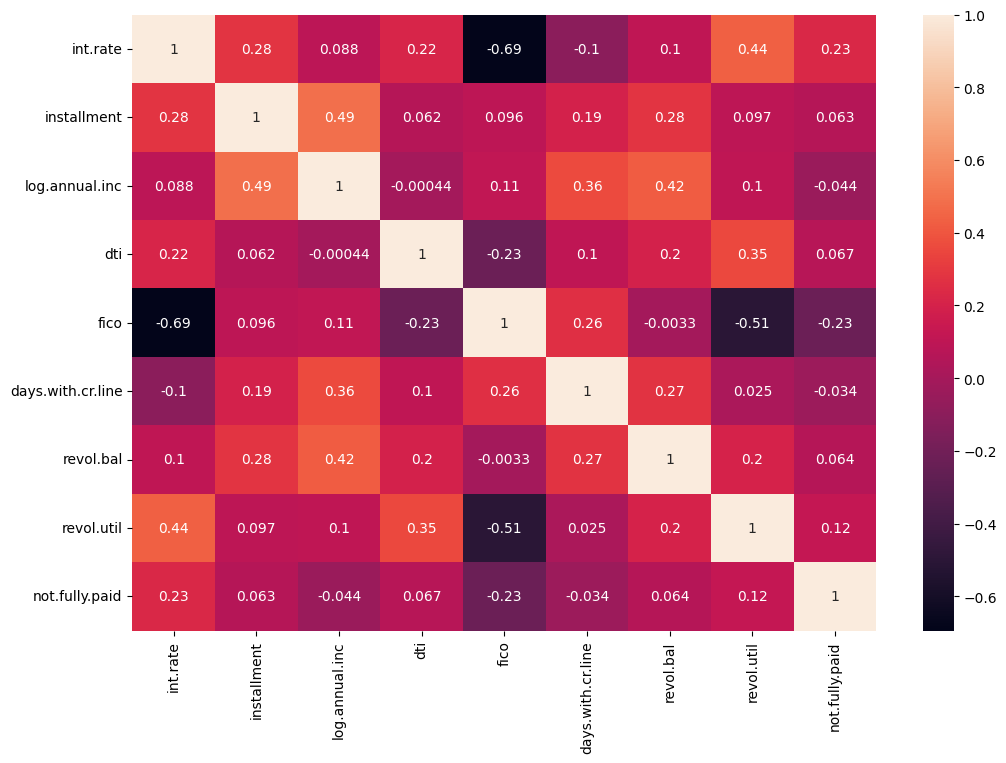

In [30]:

import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(data_num.corr(), annot=True)

<Axes: >

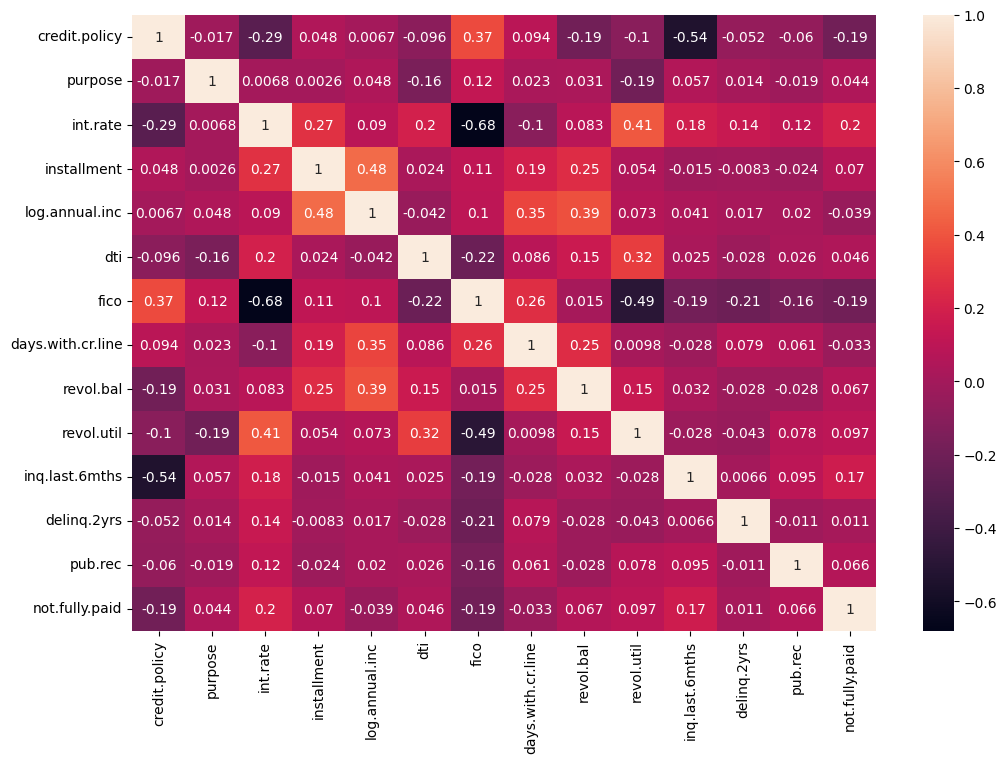

In [56]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

NameError: name 'plt' is not defined

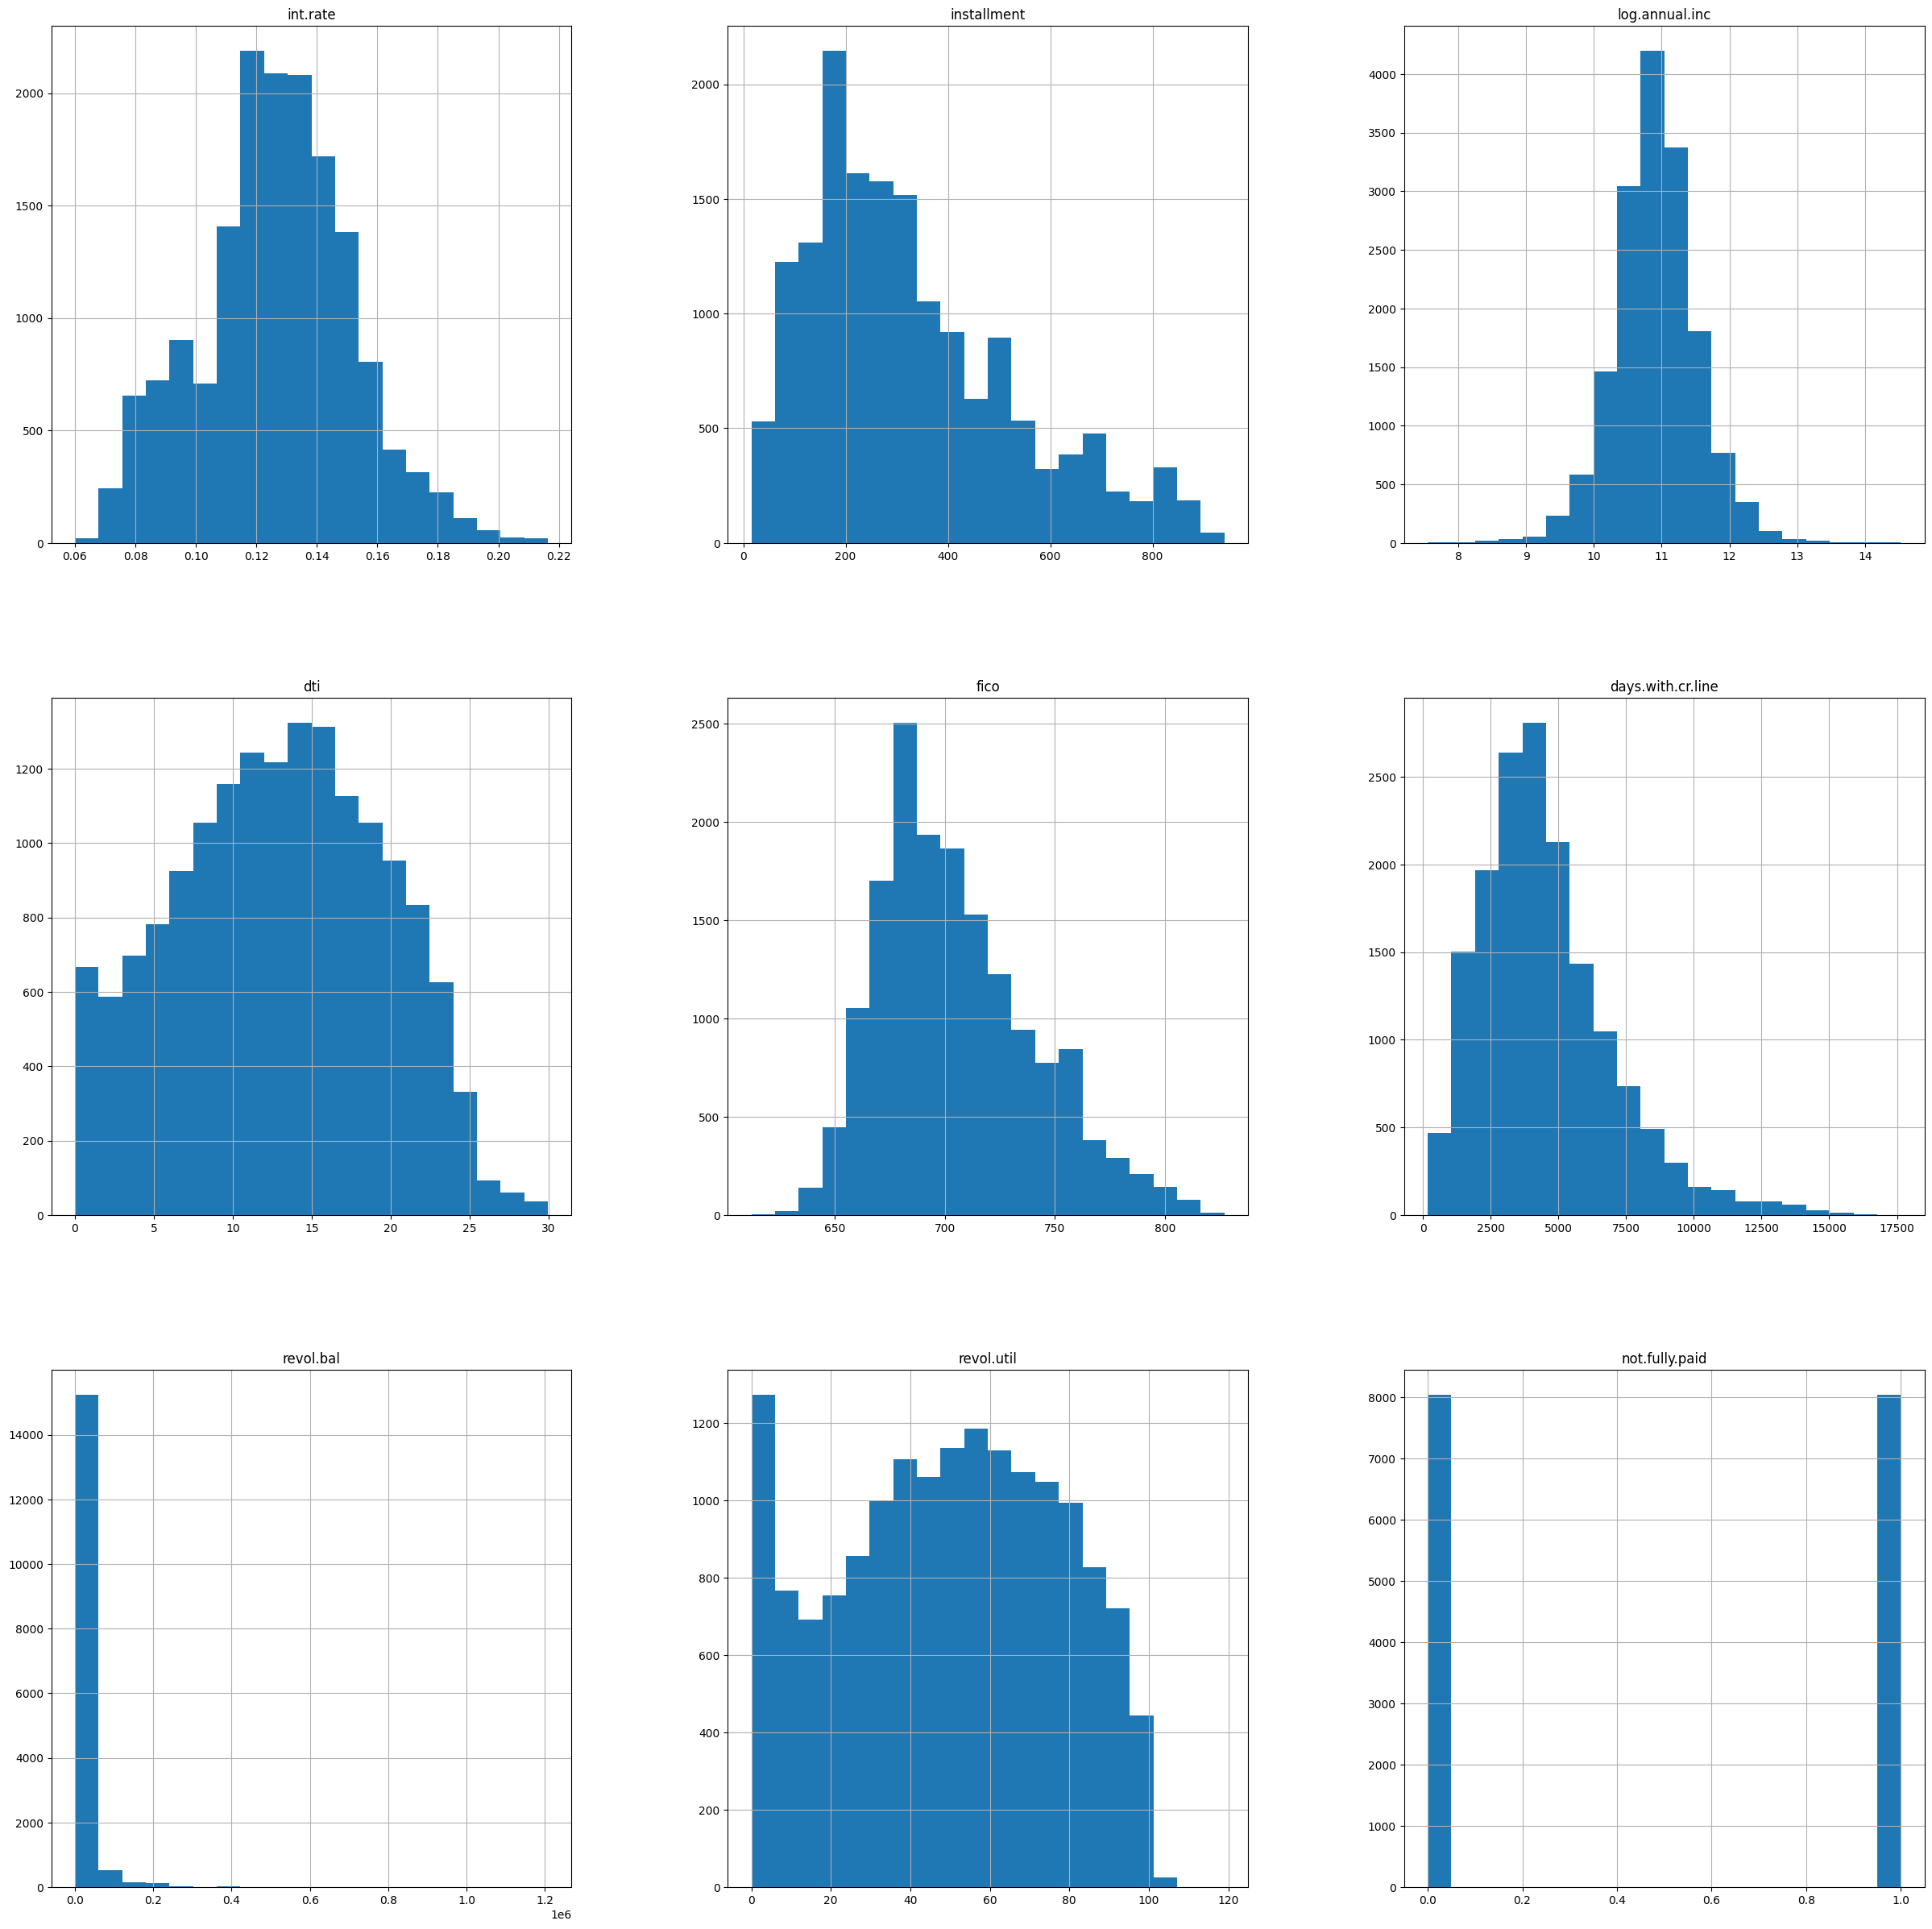

In [80]:
data_num.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

Ahora vamos a eliminar outliers

__________

Primero revisamos los datos numericos

In [81]:
import numpy as np
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)

In [82]:
for columna in data_num:
    detect_outlier(columna)

In [83]:
# Upper bounded outliers
for var in ['int.rate' ,'installment', 'log.annual.inc', 'fico', 'days.with.cr.line', 'revol.bal', 'not.fully.paid']:
    df[var].clip(upper=df[var].quantile(.95), inplace=True)
    
# Lower and Upper bounded outliers
for var in ['log.annual.inc']:
    df[var].clip(lower = df[var].quantile(.05), upper = df[var].quantile(0.95), inplace=True)

C:\Users\corre\AppData\Local\Temp\ipykernel_17496\378881240.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '62737.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[var].clip(upper=df[var].quantile(.95), inplace=True)


In [84]:
from scipy.stats import skew

vars_skewed = data_num.apply(lambda x: skew(x)).sort_values(ascending = False)
vars_skewed

revol.bal            9.460134
days.with.cr.line    1.113521
installment          0.858129
fico                 0.638330
log.annual.inc       0.050671
int.rate             0.046176
not.fully.paid       0.000000
dti                 -0.045975
revol.util          -0.101565
dtype: float64

In [85]:
high_skew = vars_skewed[abs(vars_skewed) > 0.3]
high_skew

revol.bal            9.460134
days.with.cr.line    1.113521
installment          0.858129
fico                 0.638330
dtype: float64

In [86]:
high_skew.index

Index(['revol.bal', 'days.with.cr.line', 'installment', 'fico'], dtype='object')

In [87]:
import numpy as np
for feat in high_skew.index:
    df[feat] = np.log1p(df[feat])

NameError: name 'plt' is not defined

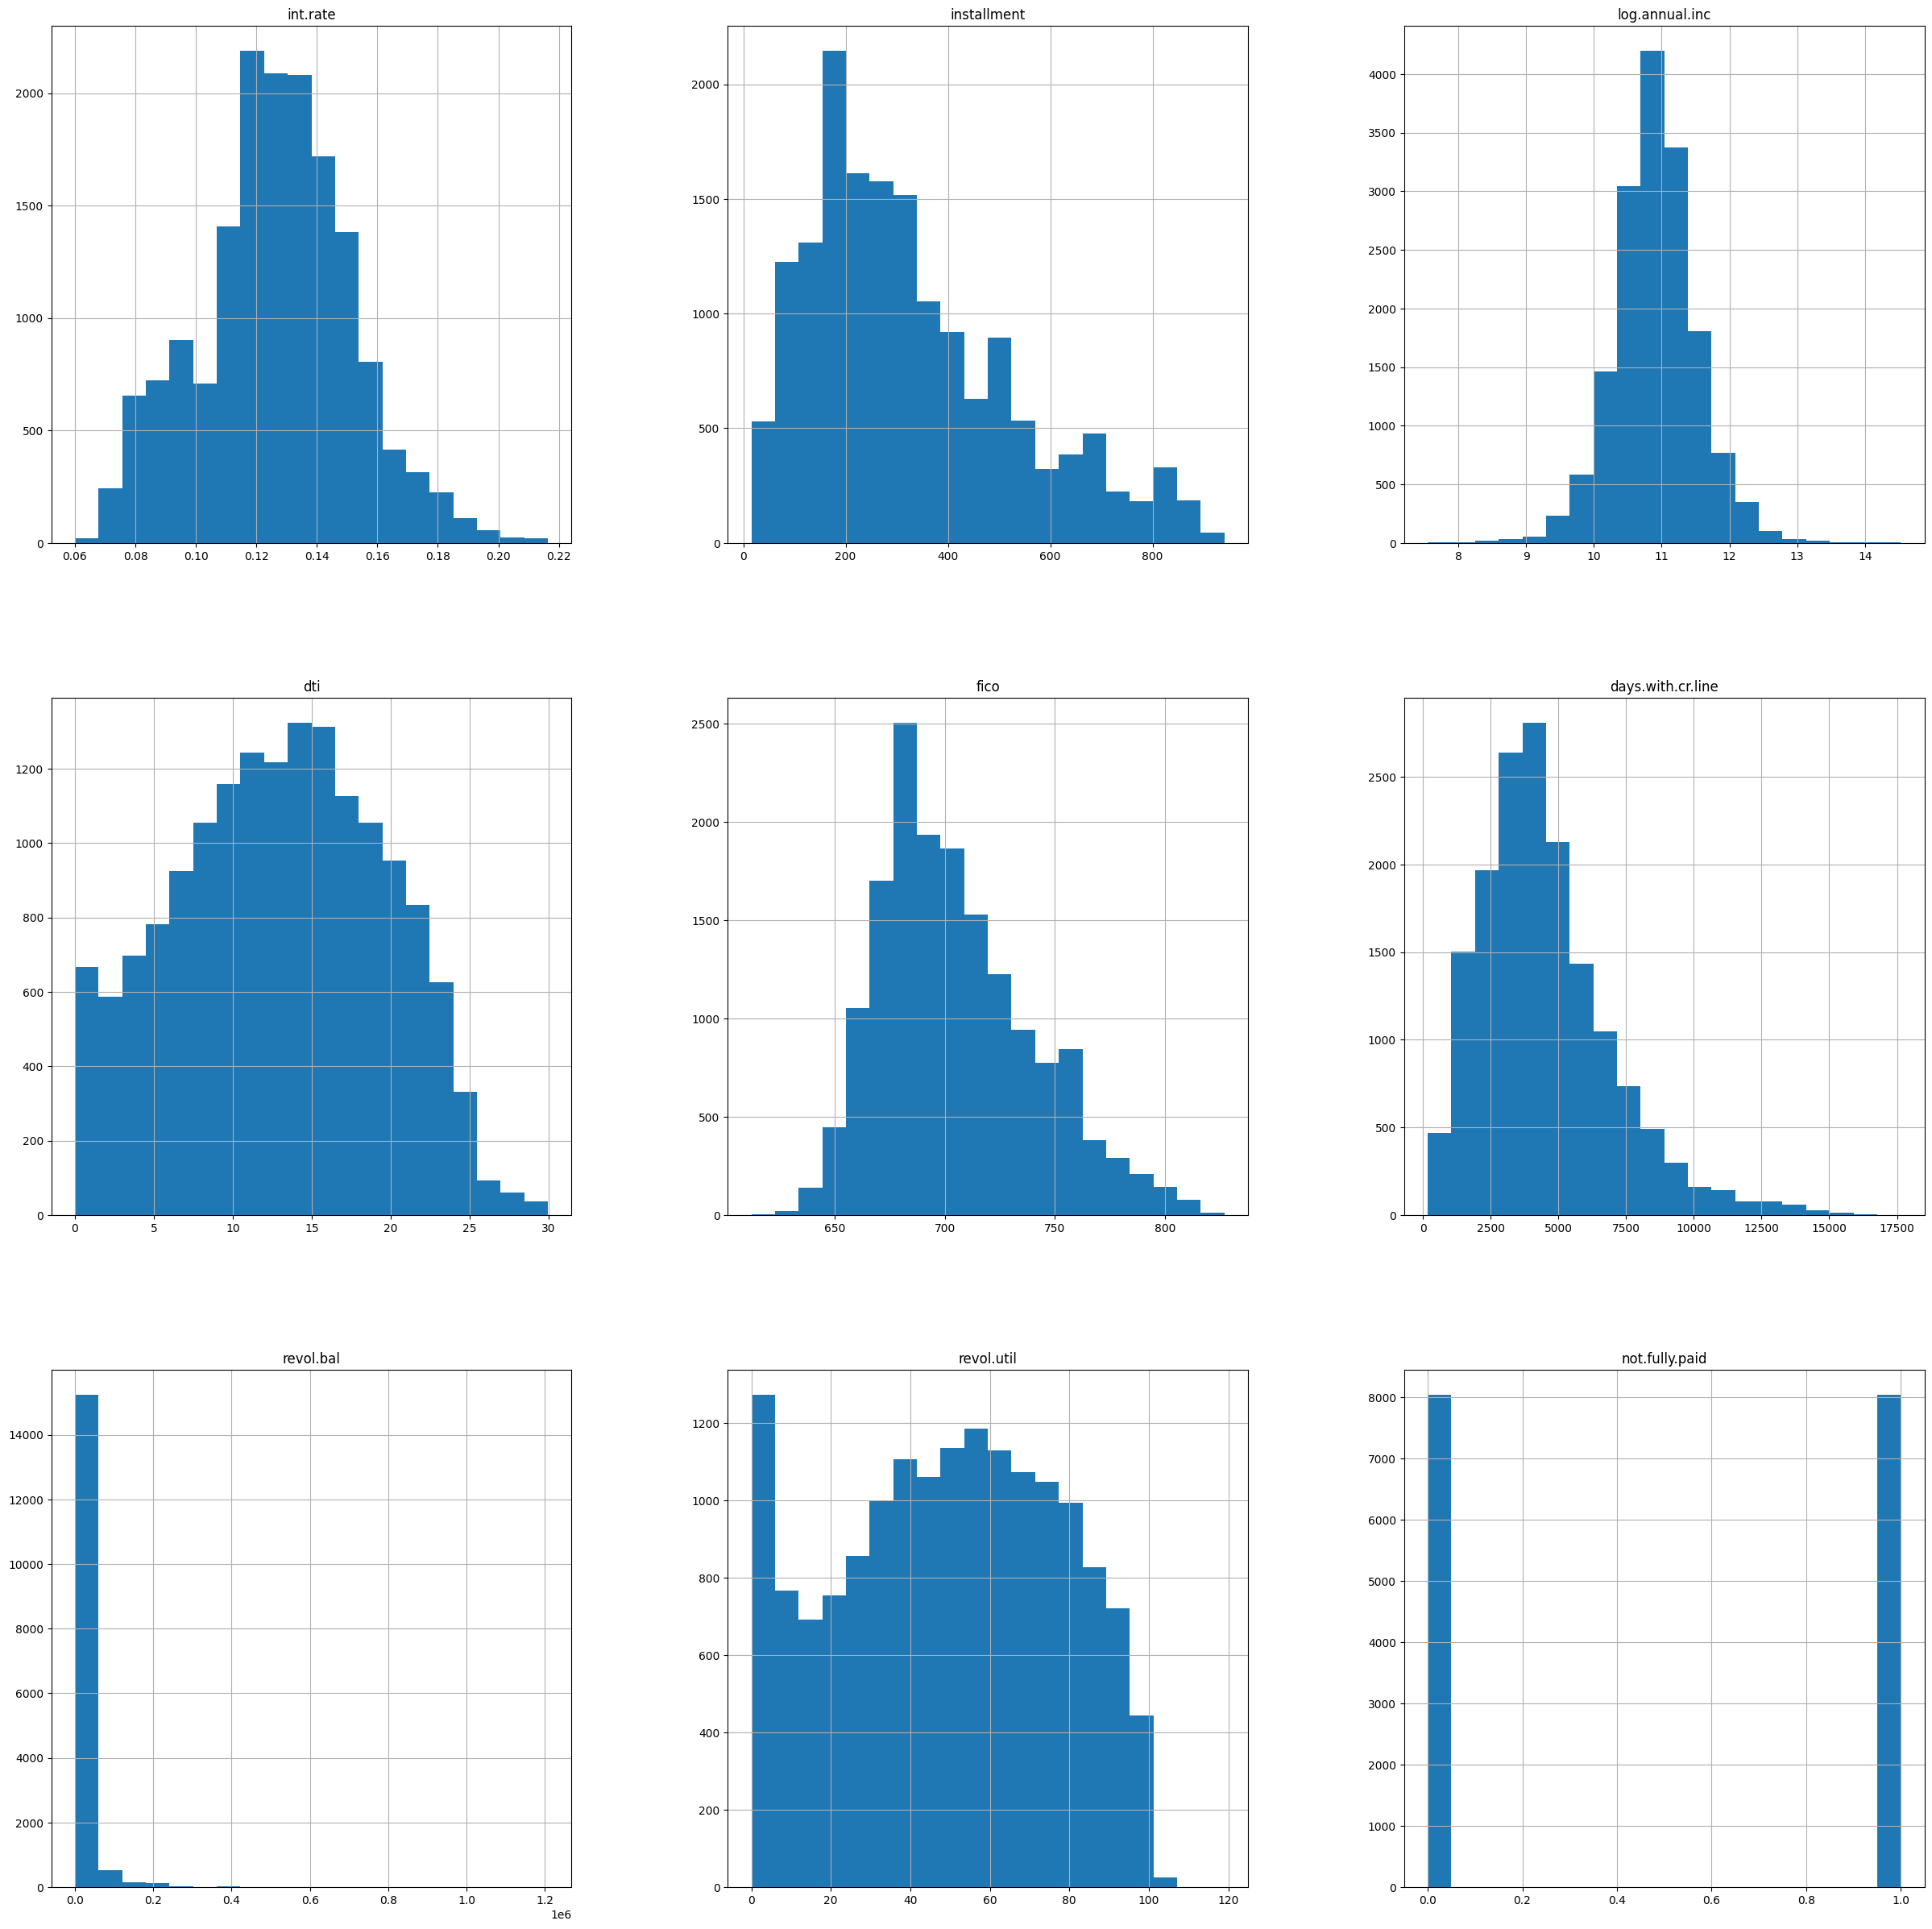

In [68]:
data_num.hist(figsize = (30, 30), bins = 20, legend = False)
plt.show()

Ahora modificamos los datos categoricos

In [58]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.118900,6.721546,11.350407,19.480000,6.603944,8.637809,10.270039,52.100000,0,0,0,0
1,1,2,0.107100,5.434682,11.082143,14.290000,6.562444,7.923348,10.422995,76.700000,0,0,0,0
2,1,0,0.135700,5.907702,10.373491,11.630000,6.526495,8.457655,8.163941,25.600000,1,0,0,0
3,1,0,0.100800,5.095834,11.350407,8.100000,6.569481,7.901362,10.424303,73.200000,1,0,0,0
4,1,2,0.142600,4.643621,11.299732,14.970000,6.504288,8.310661,8.464003,39.500000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16085,0,0,0.118579,5.424629,11.007991,11.338817,6.530878,8.052080,8.565793,28.955015,9,0,0,1
16086,0,1,0.090250,6.275894,11.032043,8.274918,6.629363,8.173978,7.413367,16.591609,4,0,0,1
16087,0,0,0.191826,6.406952,11.785092,18.506760,6.499787,8.928296,11.402765,82.235060,1,0,0,1
16088,0,1,0.148009,5.812371,10.826822,8.836319,6.480045,7.328549,9.698859,82.095442,1,0,0,1


In [88]:
X = df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'inq.last.6mths', 
        'credit.policy', 'purpose']]
y = df['not.fully.paid']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
import keras

model  = keras.Sequential(
    [
        keras.layers.Dense(
        256, activation="relu", input_shape=[8]),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               2304      
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 134145 (524.00 KB)
Trainable params: 134

In [92]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [93]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/500
51/51 [==============================] - 3s 23ms/step - loss: 0.6141 - binary_accuracy: 0.6527 - val_loss: 0.5965 - val_binary_accuracy: 0.6616
Epoch 2/500
51/51 [==============================] - 1s 14ms/step - loss: 0.5887 - binary_accuracy: 0.6751 - val_loss: 0.5844 - val_binary_accuracy: 0.6725
Epoch 3/500
51/51 [==============================] - 1s 16ms/step - loss: 0.5808 - binary_accuracy: 0.6794 - val_loss: 0.5806 - val_binary_accuracy: 0.6765
Epoch 4/500
51/51 [==============================] - 1s 17ms/step - loss: 0.5751 - binary_accuracy: 0.6840 - val_loss: 0.5703 - val_binary_accuracy: 0.6812
Epoch 5/500
51/51 [==============================] - 1s 16ms/step - loss: 0.5709 - binary_accuracy: 0.6892 - val_loss: 0.5740 - val_binary_accuracy: 0.6781
Epoch 6/500
51/51 [==============================] - 1s 17ms/step - loss: 0.5664 - binary_accuracy: 0.6908 - val_loss: 0.5692 - val_binary_accuracy: 0.6802
Epoch 7/500
51/51 [==============================] - 1s 17ms/ste

In [94]:
y_pred =(model.predict(X_test)>0.5).astype("int32")
              
y_pred

101/101 [==============================] - 0s 2ms/step


array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred)

0.6960845245494096

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1614
           1       0.70      0.68      0.69      1604

    accuracy                           0.70      3218
   macro avg       0.70      0.70      0.70      3218
weighted avg       0.70      0.70      0.70      3218

